In [1]:
# General imports
import matplotlib.pyplot as plt

# Import the FOOOF object
from fooof import FOOOF

# Import some internal functions
#   These are used here to demonstrate the algorithm
#   You do not need to import these functions for standard usage of the module
from fooof.sim.gen import gen_aperiodic
from fooof.plts.spectra import plot_spectrum
from fooof.plts.annotate import plot_annotated_peak_search

In [37]:
# Set whether to plot in log-log space
plt_log = True

In [9]:
import scipy

In [76]:
freqs = scipy.io.loadmat('freqs.mat')
freqs = (freqs['freqs'])[0]
print(freqs)

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


In [77]:
mean_pow = scipy.io.loadmat('mean_pow.mat')
spectrum = (mean_pow['mean_pow'])[0]
print(spectrum)

[2663.18612013 2777.90111298 2684.20863545 2617.98511516 2505.0287282
 2453.97311254 3178.94884474 4771.96429686 5045.89270752 4275.3539031
 3273.30651928 2400.43242661 1873.15804802 1597.32838278 1435.63663589
 1329.4489078  1244.38129169 1172.84749203 1110.31101619 1047.79001437
  985.54408764  926.04580764  872.06831823  825.20463856  784.1682148
  746.20308303  710.4387543   676.088517    643.86920751  613.14540044
  584.48035714  556.18237019  529.72998681  504.98478691  482.18922963
  461.23638838  441.0524404   422.45869299  404.77953739]


In [34]:
freqs

array([ 2.        ,  2.18101547,  2.37841423,  2.59367911,  2.82842712,
        3.08442165,  3.36358566,  3.66801617,  4.        ,  4.36203093,
        4.75682846,  5.18735822,  5.65685425,  6.1688433 ,  6.72717132,
        7.33603235,  8.        ,  8.72406186,  9.51365692, 10.37471644,
       11.3137085 , 12.3376866 , 13.45434264, 14.67206469, 16.        ,
       17.44812372, 19.02731384, 20.74943287, 22.627417  , 24.67537321,
       26.90868529, 29.34412938, 32.        , 34.89624745, 38.05462768,
       41.49886575])

In [93]:
fm = FOOOF(aperiodic_mode='knee',max_n_peaks=3,min_peak_height=0.15,peak_width_limits=[2,12])


In [94]:
fm.add_data(freqs, spectrum, [freqs[0], freqs[-1]])


In [95]:
fm.fit(freqs, spectrum, [freqs[0], freqs[-1]])

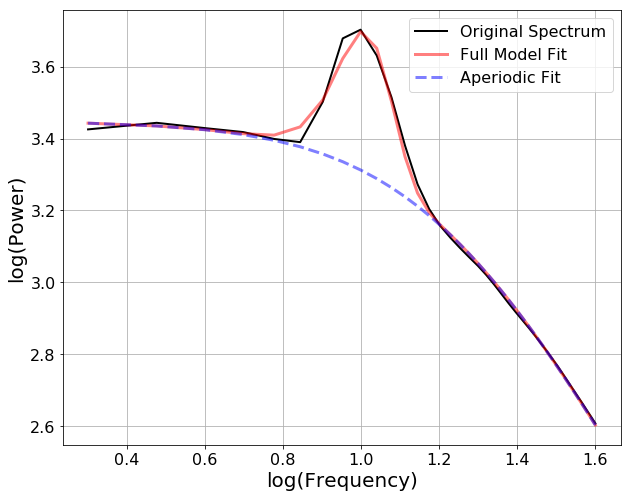

In [96]:
# Plot the power spectrum
fm.plot(plt_log=True)

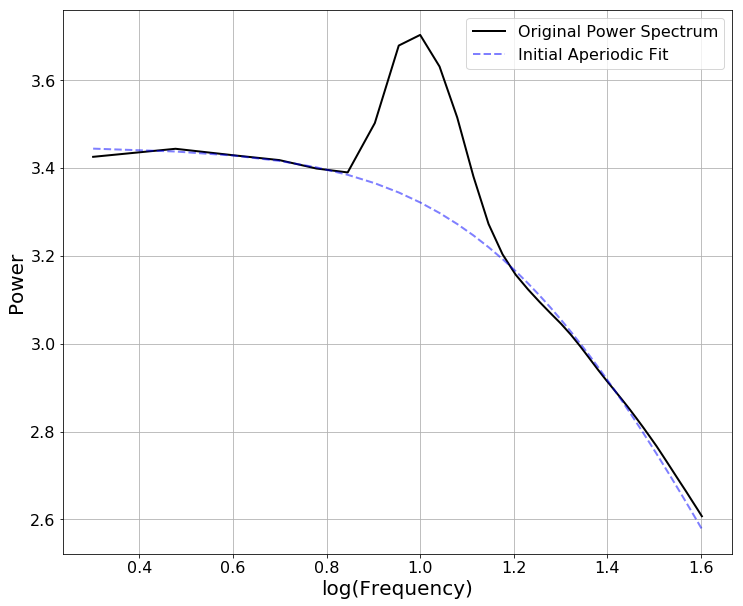

In [97]:
# Do an initial aperiodic fit - a robust fit, that excludes outliers
#   This recreates an initial fit that isn't ultimately stored in the FOOOF object
init_ap_fit = gen_aperiodic(fm.freqs, fm._robust_ap_fit(fm.freqs, fm.power_spectrum))

# Plot the initial aperiodic fit
_, ax = plt.subplots(figsize=(12, 10))
plot_spectrum(fm.freqs, fm.power_spectrum, plt_log,
              label='Original Power Spectrum', color='black', ax=ax)
plot_spectrum(fm.freqs, init_ap_fit, plt_log, label='Initial Aperiodic Fit',
              color='blue', alpha=0.5, linestyle='dashed', ax=ax)

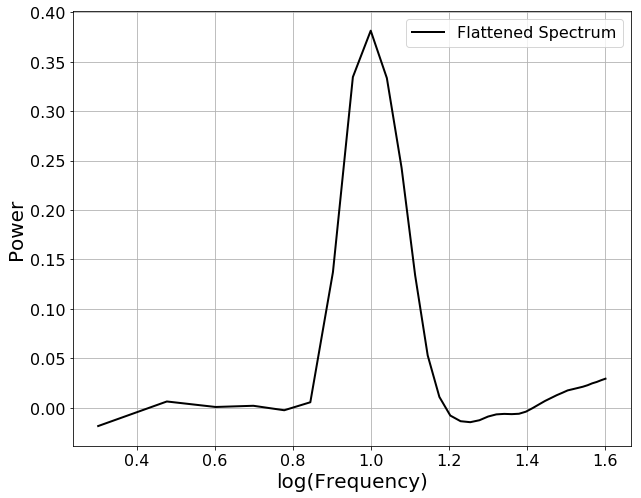

In [98]:
# Recompute the flattened spectrum using the initial aperiodic fit
init_flat_spec = fm.power_spectrum - init_ap_fit

# Plot the flattened the power spectrum
plot_spectrum(fm.freqs, init_flat_spec, plt_log,
              label='Flattened Spectrum', color='black')

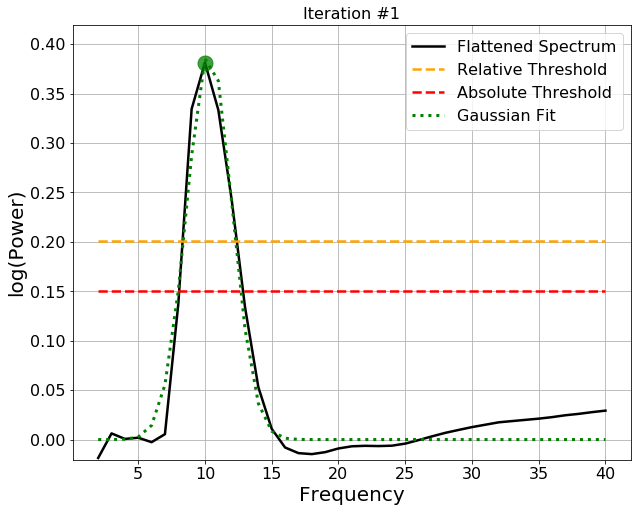

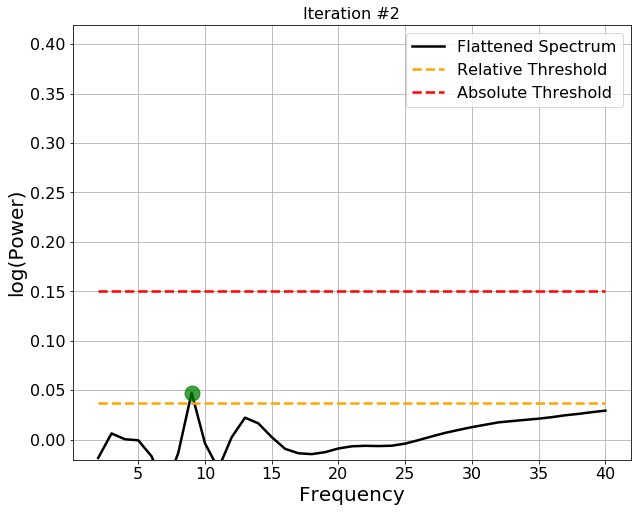

In [99]:
# Plot the iterative approach to finding peaks from the flattened spectrum
plot_annotated_peak_search(fm)

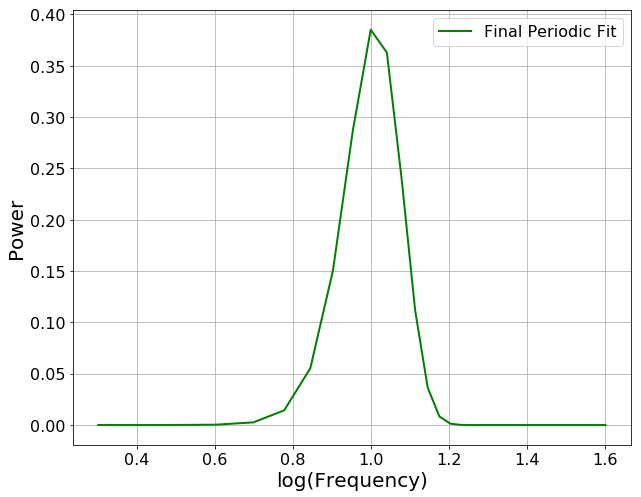

In [100]:
plot_spectrum(fm.freqs, fm._peak_fit, plt_log, color='green', label='Final Periodic Fit')

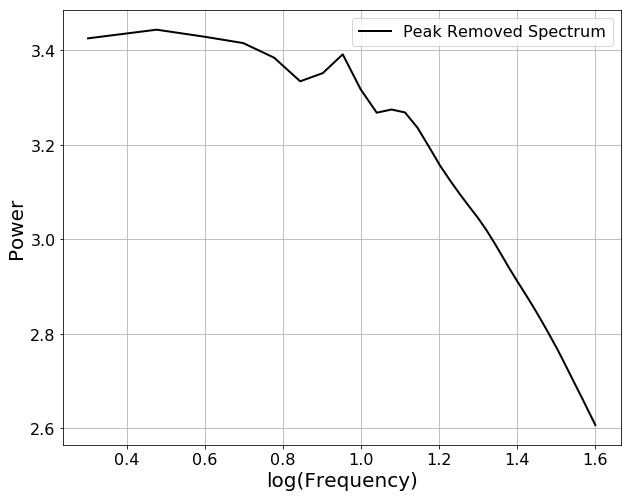

In [101]:
# Plot the peak removed power spectrum, created by removing peak fit from original spectrum
plot_spectrum(fm.freqs, fm._spectrum_peak_rm, plt_log,
              label='Peak Removed Spectrum', color='black')